<a href="https://colab.research.google.com/github/aditikamble123/aditi-kamble/blob/main/Facial_Emotion_Recognition_and_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install kaggle

In [16]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [17]:
! chmod 600 ~/.kaggle/kaggle.json

In [18]:
! kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

 93% 264M/285M [00:01<00:00, 234MB/s]
100% 285M/285M [00:01<00:00, 244MB/s]


In [25]:
! unzip icml_face_data.csv.zip

Archive:  icml_face_data.csv.zip
  inflating: icml_face_data.csv      


In [27]:
icml_faces = pd.read_csv('icml_face_data.csv')

In [28]:
def plot_images(df, emotion_class):

    emo_df = df[df.emotion==emotion_class]

    row = emo_df.sample(1)

    img = np.fromstring(row[' pixels'].iloc[0], dtype=int, sep=' ')

    img = np.reshape(img, (48, 48))

    image = np.zeros((48,48,3))

    image[:,:,0] = img

    image[:,:,1] = img

    image[:,:,2] = img

    image = np.array(image.astype(np.uint8))

    return image

In [34]:
# prompt: define plt and np and emotion_num_map

import matplotlib.pyplot as plt
import numpy as np

emotion_num_map = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}


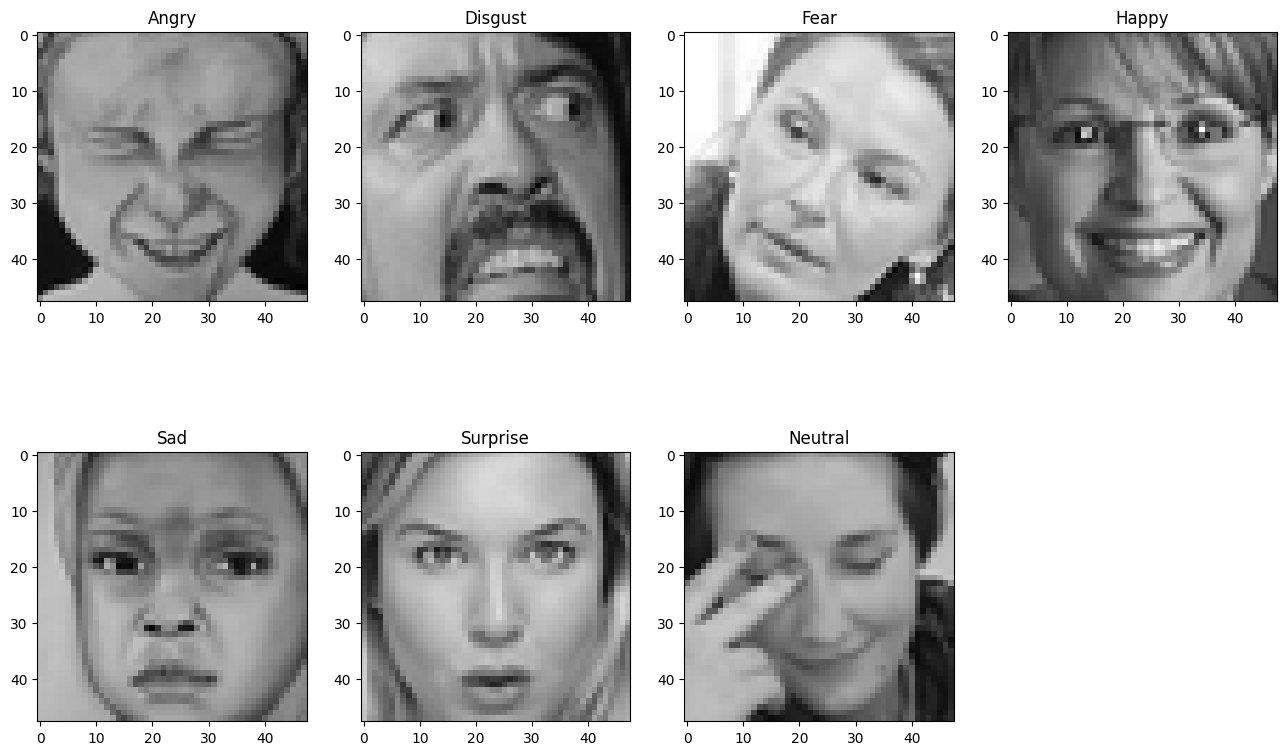

In [35]:
plt.figure(0, figsize=(16,10))

for i in range(7):

    plt.subplot(2,4,i+1)

    image = plot_images(icml_faces,i)

    plt.imshow(image)

    plt.title( emotion_num_map[i])

In [36]:
# prompt: Create an empty array that will be used as a placeholder to hold the images.

import numpy as np
images_placeholder = np.empty((7, 48, 48, 3), dtype=np.uint8)


In [37]:
# prompt: convert the string to a python list

import pandas as pd
def string_to_list(pixels_string):
  return [int(x) for x in pixels_string.split()]

# Example usage:
example_row = icml_faces.sample(1)
pixels_list = string_to_list(example_row[' pixels'].iloc[0])
print(pixels_list)


[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 255, 255, 230, 175, 124, 109, 100, 102, 103, 120, 127, 123, 118, 114, 110, 106, 102, 182, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 254, 207, 151, 137, 127, 91, 100, 99, 96, 105, 112, 116, 107, 94, 84, 84, 92, 103, 95, 174, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 237, 157, 111, 111, 110, 100, 86, 89, 113, 124, 109, 90, 95, 102, 90, 83, 76, 73, 80, 98, 87, 185, 255, 253, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254, 255, 236, 152, 120, 121, 102, 88, 86, 86, 100, 102, 115, 120, 101, 89, 88, 89, 79, 84, 81, 74, 77, 97, 93, 211, 255, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 246, 167, 126, 121, 111, 1

In [38]:
# prompt: convert the flattened list into a 2D image and do this for all images

import numpy as np
def string_to_image(pixels_string):
  pixels_list = string_to_list(pixels_string)
  image_array = np.array(pixels_list, dtype=np.uint8).reshape(48, 48)
  return image_array

# Apply the function to the entire DataFrame
icml_faces['image'] = icml_faces[' pixels'].apply(string_to_image)


In [39]:
# prompt: convert the pixel values to float data type.

import numpy as np
# Assuming 'icml_faces' is your DataFrame and 'image' is the column with pixel data as NumPy arrays
icml_faces['image'] = icml_faces['image'].apply(lambda img: img.astype(np.float32))


In [41]:
# prompt:  change these values using the to categorical() function in Python

from tensorflow.keras.utils import to_categorical

# Assuming 'emotion' is the column with your emotion labels
y_train = to_categorical(icml_faces['emotion'])


In [42]:
def preprocess(input_data):

    input_images = np.zeros(shape=(input_data.shape[0], 48, 48))

    for i, row in enumerate(input_data.index):

        image = np.fromstring(input_data.loc[row, ' pixels'], dtype=int, sep=' ')

        image = np.reshape(image, (48, 48))

        input_images[i] = image

    input_images = input_images.reshape((input_images.shape[0], 48, 48, 1))

    input_images = input_images.astype('float32')/255

    input_labels = np.array(list(map(int, input_data['emotion'])))

    image_labels = to_categorical(input_labels, 7)

    return  input_images, image_labels

In [45]:
# prompt: Build the Model: Convolutional Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 output classes for emotions

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Enable mixed precision training
# (Make sure you have a compatible GPU for this)
policy = tf.keras.mixed_precision.Policy('mixed_float16')
tf.keras.mixed_precision.set_global_policy(policy)

# Assuming 'icml_faces' is your DataFrame and 'image' and 'emotion' are the relevant columns
X_train = np.stack(icml_faces['image'].values)
X_train = X_train.reshape(-1, 48, 48, 1) / 255.0  # Normalize pixel values

y_train = to_categorical(icml_faces['emotion'])

# Train the model with a larger batch size
history = model.fit(X_train, y_train, batch_size=256, epochs=10, validation_split=0.2)  # Increased batch size


Epoch 1/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 372s 3s/step - accuracy: 0.2402 - loss: 1.8227 - val_accuracy: 0.3784 - val_loss: 1.5962
Epoch 2/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 380s 3s/step - accuracy: 0.3741 - loss: 1.6113 - val_accuracy: 0.4478 - val_loss: 1.4558
Epoch 3/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 370s 3s/step - accuracy: 0.4303 - loss: 1.4780 - val_accuracy: 0.4720 - val_loss: 1.3822
Epoch 4/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 380s 3s/step - accuracy: 0.4774 - loss: 1.3762 - val_accuracy: 0.5022 - val_loss: 1.2947
Epoch 5/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 351s 3s/step - accuracy: 0.4967 - loss: 1.3127 - val_accuracy: 0.5180 - val_loss: 1.2738
Epoch 6/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 380s 3s/step - accuracy: 0.5139 - loss: 1.2781 - val_accuracy: 0.5387 - val_loss: 1.2214
Epoch 7/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 383s 3s/step - accuracy: 0.5436 - loss: 1.2207 - val_accuracy: 0.5400 - val_loss: 1.2018
Epoch 8/10
113/113 ━━━━━━━━━━━━━━━━━━━━ 384s 3s/step - accuracy: 0.5554 - loss: 1.1900 - val_accu

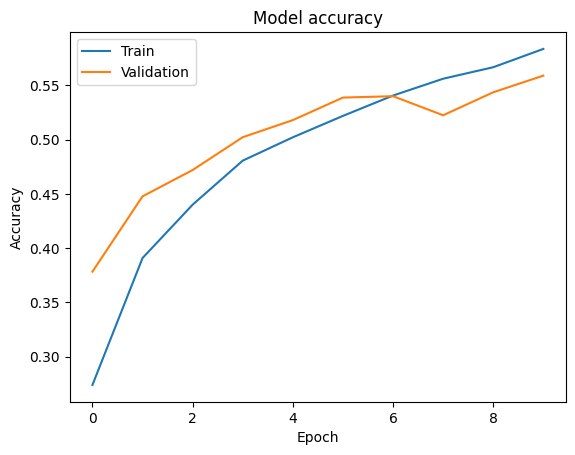

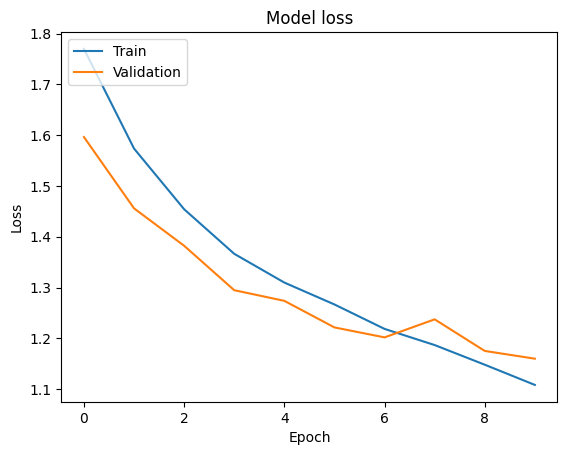

In [52]:
# prompt: Analyze the Model Performance

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
